# Seconda lezione di laboratorio
## Esercizio 1

La prima parte dell'esercizio 1 consiste nel calcolare l'integrale $I = \int_a^b f(x) dx= \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$. Questo integrale è stato calcolato numericamente con il metodo montecarlo della media. In particolare sono state ottenute $N=100$ stime dell'integrale ${\{\langle I \rangle_i\}}_{i=1}^{N=100}$, ciascuna delle quali calcolata con $L=100$ estrazioni, ovvero $${\langle I \rangle}_{i} = \frac{1}{L}\sum_{j=1}^{L=100} f(x_j) = \frac{1}{L}\sum_{j=1}^{L=100} \frac{\pi}{2}\cos(\pi x_j/2)$$ con $x_j$ numero random estratto con distribuzione uniforme nell'intervallo $[0, 1]$.
È poi stata calcolata la media delle $N=100$ stime ottenute $\langle I \rangle = \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i$ e la loro deviazione standard (deviazione standard della media) $$\sigma_m \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^{N=100} {\langle I \rangle}^2_i - \left( \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i \right)^2 \right]} $$

Nel grafico sottostante è stato rappresentato il valore $\langle I \rangle$ con relativa barra di errore $\sigma_m$ all'aumentare del numero di blocchi presi in considerazione, e quindi del numero totale di estrazioni effettuate per ottenere tale stima. È stato confrontato con il valore atteso 1.

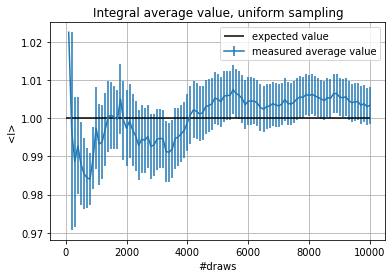

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("Integral.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, label='measured average value')
plt.hlines(1, 0, 10000, label='expected value')
plt.xlabel('#draws')
plt.ylabel('<I>')
plt.title('Integral average value, uniform sampling')
plt.grid(True)
plt.legend()
plt.show()

La seconda parte dell'esercizio 1 consiste nel calcolare lo stesso integrale della prima parte, ma anziché campionare uniformemente l'intervallo $[0, 1]$, è stato utilizzato il metodo dell'*importance sampling*. Anche in questo caso sono state ottenuto $N=100$ stime dell'integrale ${\{\langle I \rangle_i\}}_{i=1}^{N=100}$, ciascuna delle quali calcolata con $L=100$ estrazioni, ma con differente distribuzione di probabilità. È possibile infatti riscrivere l'integrale nella forma $\int_a^b f(x) dx = \int_a^b \frac{f(x)}{p(x)} p(x)$ dove $p(x)$ è una distribuzione di probabilità normalizzata in $[a, b]$ liberamente scelta. Volendo ottenere un calcolo più preciso a parità del numero di estrazioni, si sceglie $p(x)$ in modo che segua il più possibile l'andamento di $f(x)$ (in modo da minizzare la varianza della stima dell'integrale). In particolare la scelta è ricaduta su una retta passante per il punto $(1, 0)$ e poi normalizzata, ottenendo l'espressione $p(x)=2(1-x)$. Al fine di ottenere una variabile random estratta con tale distribuzione di probabilità, è stato utilizzato il metodo dell'inversa della cumulativa, perciò, data $y$ una variabile random con distribuzione uniforme in $[0, 1]$, $x=1-\sqrt{1-y}$ è una variabile random con distribuzione $p(x)$ in $[0, 1]$. La stima dell'integrale può essere ottenuta da $${\langle I \rangle}_{i} = \frac{1}{L}\sum_{j=1}^{L=100} \frac{f(x_j)}{p(x_j)} = \frac{1}{L}\sum_{j=1}^{L=100} \frac{\pi}{2}\cos(\pi x_j/2) \frac{1}{2(1-x_j)}$$
È poi stata calcolata la media delle $N=100$ stime ottenute $\langle I \rangle = \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i$ e la loro deviazione standard (deviazione standard della media) $$\sigma_m \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^{N=100} {\langle I \rangle}^2_i - \left( \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i \right)^2 \right]} $$

Nel grafico sottostante è stato rappresentato il valore $\langle I \rangle$ con relativa barra di errore $\sigma_m$ all'aumentare del numero di blocchi presi in considerazione, e quindi del numero totale di estrazioni effettuate per ottenere tale stima. È stato confrontato con il valore atteso 1.

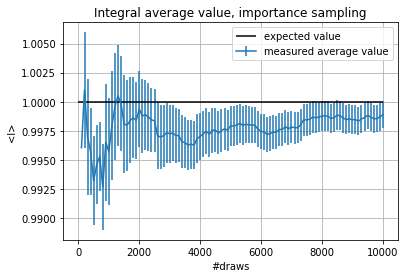

In [33]:
x, f, error = np.loadtxt("IntIS.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, label='measured average value')
plt.hlines(1, 0, 10000, label='expected value')
plt.xlabel('#draws')
plt.ylabel('<I>')
plt.title('Integral average value, importance sampling')
plt.grid(True)
plt.legend()
plt.show()

I risultati riportati danno conferma di quanto detto in precedenza. Infatti a parità di estrazioni effettuate, l'incertezza statistica sulla stima finale dell'integrale utilizzando il metodo dell'importance sampling è circa $\frac{1}{4}$ dell'incertezza statistica sulla stima finale dell'integrale utilizzando un campionamento uniforme dell'intervallo considerato.

## Esercizio 2

La prima parte dell'esercizio 2 consiste nel simulare l'avanzamento di un random walker lungo un reticolo 3D di passo $P=1$ per un numero $N_P=100$ di passi per ottenere una stima statistica del valore della distanza a cui il random walker giunge, all'aumentare del numero di passi.
Sono stati presi in considerazione $G=100$ gruppi di random walkers, e ciascun gruppo ha fornito una stima della distanza in funzione del numero di passi $\{d_j(i)\}_{j=1}^{G=100}$ (con $i=1,..,N_P$ i-esimo passo). Ogni gruppo è stato composto da $N=100$ random walkers. La stima di $d_j(i)$ per il j-esimo gruppo è $$d_j(i)=\sqrt{\frac{1}{N}\sum_{k=1}^{N=100} d_{jk}^2(i)}$$ dove $d_{jk}(i)$ è la distanza dall'origine in funzione del numero di passi del k-esimo random walker del j-esimo gruppo.
È poi stata calcolata la media delle $G=100$ stime ottenute $d(i) = \frac{1}{G} \sum_{j=1}^{G=100} d_j(i)$ e la loro deviazione standard (deviazione standard della media) $$\sigma_m(i) \simeq \sqrt{\frac{1}{G-1} \left[ \frac{1}{G} \sum_{j=1}^{G=100} d^2_j(i) - \left( \frac{1}{G} \sum_{j=1}^{G=100} d_j(i) \right)^2 \right]} $$

L'estrazione di una direzione random è stata implementata estraendo un intero tra 1, 2 e 3 ed associando ad ogni numero una direzione $\bigl(1 \rightarrow x, 2 \rightarrow y, 3 \rightarrow z \bigr )$.
L'estrazione di un verso random è stata implementata dividendo l'intervallo $[0, 1]$ in 2 sottointervalli di uguale ampiezza, associando alla prima metà il verso negativo, alla seconda metà il verso positivo ed estraendo una variabile random con distribuzione uniforme in $[0, 1]$.

Un comportamento diffusivo implica che $\sqrt{\langle d \rangle ^2} = k\sqrt{t} = \sqrt{2Dt}$ dove $D=\frac{P^2}{2\tau}$, $P=1$ è la lunghezza di un passo e $\tau$ è il tempo che trascorre tra due passi, perciò $\sqrt{\langle d \rangle ^2} = \sqrt{\frac{P^2t}{\tau}}$. Nel nostro caso il tempo $t$ può assumere solo valori multipli di $\tau$ e quindi il rapporto $\frac{t}{\tau}$ non è altro che il numero di passi effettuati $i$.
Allora $\sqrt{\langle d \rangle ^2} = \sqrt{i}$. Nel limite di un numero grande di passi questo è applicabile anche ad un reticolo 3D e non sono ad una diffusione uniforme nelle 3 dimensioni.

Nella prima figura è stata riportata la funzione $d(i)$ ottenuta come sopra detto con le relative barre di errore (di 2 ordini di grandezza inferiori alla quantità misurata e perciò di difficile visualizzazione).
Per verificare il comportamento diffusivo è inoltre stato fatto un fit di $d(i)$ con la funzione $d=k\sqrt{i}$, con $k$ parametro libero. È stato riportato il valore di $k$ che meglio approssima i dati, il cui valore atteso è 1.
Nella seconda figura è stata riportata la quantità $d(i)-k\sqrt{i}$ con gli errori relativi a $d(i)$ per confrontare il l'andamento atteso con quello osservato.

optimized parameter k =
[0.99732068]


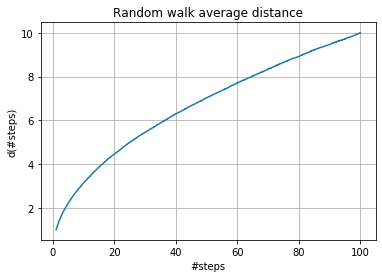

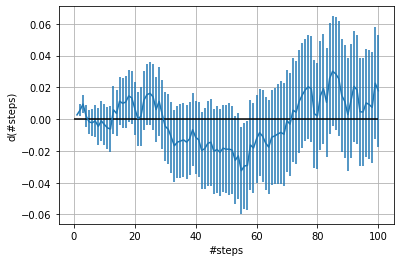

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,k):
    return k*x**(1/2)


x, y, error = np.loadtxt("lattice_walks.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure()
plt.xlabel('#steps')
plt.ylabel('d(#steps)')
plt.grid(True)
plt.errorbar(x, y, yerr=error)
plt.title('Random walk average distance')


plt.figure()
plt.xlabel('#steps')
plt.ylabel('d(#steps)')
plt.grid(True)
plt.title('')
p_opt, p_cov = curve_fit(f, x, y, bounds=(0, 2))
y_fit = f(x,p_opt[0])
    
plt.errorbar(x,y-y_fit,yerr=error)
plt.hlines(0, 0, 100)

print("optimized parameter k =")
print(p_opt)

plt.show()

La seconda parte dell'esercizio 2 consiste nel simulare l'avanzamento di un random walker che compie passi di lunghezza $P=1$ nello spazio 3D per un numero $N_P=100$ di passi per ottenere una stima statistica del valore della distanza a cui il random walker giunge, all'aumentare del numero di passi.
Tutta la struttura della simulazione è identica al caso precedente, con l'eccezione delle modalità di avanzamento. Infatti il random walker è libero di fare il passo con uguale probabilità in tutto l'angolo solido.

La funzione di avanzamento è stata implementata con l'estrazione di due angoli $\theta$ e $\phi$ definiti con la convenzione delle coordinate polari.
In particolare se la probabilità è uniforme nell'angolo solido, allora la probabilità di estrarre una direzione in una porzione infinitesima sarà $Pd\Omega$ e sfruttando la normalizzazione si ottiene $P=\frac{1}{4\pi}$. Sostituendo l'infinitesimo di angolo solido in coordinate polari si ottiene $Pd\Omega=P\sin(\theta)d\theta d\phi=\frac{1}{4\pi}\sin(\theta)d\theta d\phi$, che deve essere uguale al prodotto di due densità di probabilità indipendenti e normalizzate, perciò $P(\theta)=\frac{\sin(\theta)}{2}$ e $P(\phi)=\frac{1}{2\pi}$. L'angolo $\phi$ segue una distribuzione uniforme nell'intervallo $[0, 2\pi]$ e l'angolo $\theta$ segue una distribuzione $P(\theta)$ nell'intervallo $[0, \pi]$. Per estrarre $\theta$ con distribuzione $P(\theta)$ si utilizza il metodo dell'inversa della cumulativa, e in particolare, data una variabile random x distribuita uniformemente nell'intervallo $[0, 1]$, $\theta=\arccos(1-2x)$ è una variabile con distribuzione $P(\theta)$.

Per quanto detto nella prima parte, il comportamento diffusivo nello spazio 3D dovrebbe essere del tutto analogo a quello nel reticolo 3D quando il numero di passi effettuati sia sufficientemente grande.
Le figure, il fit e il test del $\chi^2$ sono analoghe a quelle riportate precedentemente.

chi2 =
82.76150997943702
optimized parameter k =
[0.99994333]


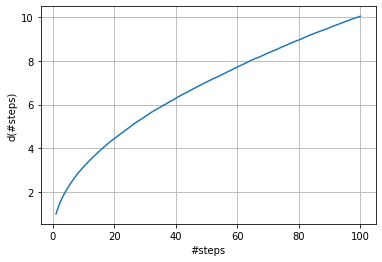

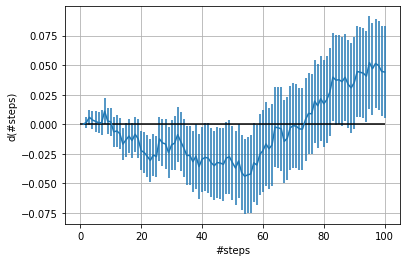

In [35]:
def f(x,k):
    return k*x**(1/2)


x, y, error = np.loadtxt("random_direction_walks.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure()
plt.xlabel('#steps')
plt.ylabel('d(#steps)')
plt.grid(True)
plt.plot(x, y)

plt.figure()
plt.xlabel('#steps')
plt.ylabel('d(#steps)')
plt.grid(True)
p_opt, p_cov = curve_fit(f, x, y, bounds=(0, 2))
y_fit = f(x,p_opt[0])
    
plt.errorbar(x,y-y_fit,yerr=error)
plt.hlines(0, 0, 100)

chi2=0.
for i in range(99):
    chi2+=(abs(y[i+1]-y_fit[i+1])/error[i+1])**2 #il primo dato ha varianza nulla

print("chi2 =")
print(chi2)

print("optimized parameter k =")
print(p_opt)

plt.show()